# Principal Component Analysis (PCA)

## Objective
Demonstrate the underlying mechanisms of reduceing the dimension N of data into k (k << N) whereas preserving the information of the data as much (e.g. 95%). Use MNIST (28x28 pixel images) and Scikit Learn.

## Idea
The idea of dimensionality reduction is to decompose the data by projecting it into N principal component (PC) axes, and represent the total information of the data as a linear sum of the variance at each axis. 

The distribution of the data points represents the information that the data brings. The direction where the data varies more carries more information. 

<pre>
<img align="left" src="./images/pca/primary_direction.png" width="300">
</pre>

Identify the vector that varies the most (PC1), and then the second most (PC2), and continue to the least most (PCn). The amount of information at each PC is given by its variance, which can be used to quantify the contribution of each PC.

### Eigen Decomposition
Data is represented as a matrix. By diagonalisation of the matrix via co-variance matrix, we can get eigenvectors and eignvalues. The eigenvectors are the PCs and the eigenvalues are the variances of the PCs.

### Singular Value Decomposition (SVD)
The diagalisation requires co-variance matrix with calculating the product of the transpose of the matrix and the matrix itself, for which we may need significant memory space and time, or more time if we do it a sequential manner to avoid memory overflow. SVD provides the way to get the eigenvectors and eignvalues without diagonalisation.

The SVD always exists for any sort of rectangular or square matrix, whereas the eigendecomposition can only exists for square matrices, and even among square matrices sometimes it doesn't exist.

___Refer to [The Singular Value Decomposition in Multivariate Statistics ](https://github.com/oonisim/Jupyter-Notebok/blob/master/documents/svd/svd-signum.pdf) for further details.___


>    Many multivariate techniques in statlstics are described in terms of an appropriate
sums of squares and cross products matrix, such as a covariance matrix, or a
correlation matrix, rather than in terms of the original data matrix. While this
is frequently the best way of understanding and analysing a technique, it is not
necessarily the most satisfactory approach for implementing the technique
computationally. From a numerical point of view, it is usually better to work with
the data matrix and avoid the formation of a sums of squares and cross products
matrix. 
>    
>    For numerical stability it is frequently desirable to avoid forming normal
matrices~ but instead use algorithms that work directly on the data matrices (see
for example Golub, 1965). This can be especially important when small
perturbations in the data can changer or come close to chantings the rank of the
data matrix. In such cases the normal matrix will be much more sensitive to
perturbations in the data than the data matrix. 


## Pre-requisite

The dataset needs to be centered around the origin. To do it manually by yourself with numpy (Scikit Learn PCA looks after centering the data, hence not required).

```
X_centered = X - X.mean(axis=0)
```

# Setup

In [33]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import scipy as sp
import os

# to make this notebook's output stable across runs
np.random.seed(42)
np.set_printoptions(
    suppress=True #, formatter={'float_kind':'{:0.5f}'.format}
)

# To plot pretty figures
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [34]:
%%html
<!-- To left align the HTML components in Markdown -->
<style>
table {float:left}
</style>

In [68]:
def plot_digit(image):
    reshaped = image.reshape(28, 28)
    plt.imshow(reshaped, cmap="binary")
    plt.axis("off")

In [35]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [36]:
# Total percentage of the information in the data to preserve after reducing the dimensions
COVERAGE = 0.95

## Loading MNIST data

In [37]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)
NUM_CLASSES=10

In [38]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#del mnist

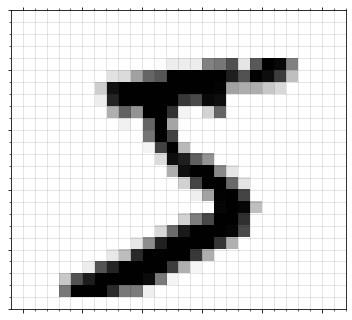

In [164]:
fig = plt.figure(figsize=(6,6))
plt.matshow(X[0].reshape(28, 28), fignum=fig.number, cmap=plt.cm.binary)
# Gridlines based on minor ticks
ax = plt.gca();

# Minor ticks
ax.set_xticks(np.arange(0.5, 28, 1), minor=True)
ax.set_yticks(np.arange(0.5, 28, 1), minor=True)

# Major ticks
ax.set_xticks(np.arange(0.5, 28, 5))
ax.set_yticks(np.arange(0.5, 28, 5))

ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

ax.grid(which='minor', color='k', alpha=0.1, linestyle='-', linewidth=1)
ax.grid(which='major', color='k', alpha=0.1, linestyle='-', linewidth=1)

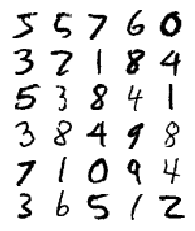

In [83]:
plot_digits(X_train[::2000])
plt.show()

# Mathematics

## Map (Rotate & Extend)
<img align="left" src="./images/pca/basis.rotate_to_map.png" width="400"> 

## Transpose
<img align="left" src="./images/pca/VT.Semantic.png" width="1000"> 

## Diagonalization
For a matrix representing data, there is a way (not always) to find the bases, in the space of which the co-variances of the data becomes 0. In the space, only the diagonal elements of the co-variance matrix has values.

<img align="left" src="./images/pca/basis.diagonalization.png" width="1000">

## Principal Components

In the space where the only the diagonal elements of the co-variance matrix have values, the variance along each basis is the contribution to the information that the data posseses. The basis along which the data has the maximum variance is the 1st principal component of the data. The basis that has 2nd maximum variance is the 2nd principal compoent, and so on. 

<img align="left" src="./images/pca/basis.variance_is_contribution.png" width="1000"> 

## Eigenvectors

Those bases are the eigenvectors and the eigenvalues are the variances. 

<img align="left" src="./images/pca/basis.variance_to_primary_component.png" width="1000"> 


## Eigenvalues
Hence Principal Comonents can be identified from the eigenvalues. Contribution at each basis to the total information is <span style="color:red"><b>its variance</b></span>, which is represented by eigenvalues.

In [40]:
X_centered = X_train - X_train.mean(axis=0)

covariance_matrix = X_centered.T.dot(X_centered) 
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

### Plot eigenvalue cumulative

Visualize how much percentage of the total information in the data can be represented with how many principal components.

In [41]:
def plot_coverage(cumulatives, xlabel, ylabel):
    dimensions = range(0, len(cumulatives))

    # --------------------------------------------------------------------------------
    # Axes
    # [Axis limits]
    # With plt.axes() you are creating a new axes again. 
    # Use ax.set_xlim(a,b) and ax.set_ylim(a,b)
    # --------------------------------------------------------------------------------
    #plt.axis((0,max(dimensions),0,1.01))
    # --------------------------------------------------------------------------------
    ax = plt.gca()
    ax.set_xlim(0, max(dimensions))
    ax.set_ylim(0, 1.01)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # --------------------------------------------------------------------------------
    # Grid
    # --------------------------------------------------------------------------------
    import math
    import matplotlib.ticker as ticker

    plt.grid(
        color='b',
        linestyle='--',
        linewidth=0.5,
        which='both'     # Both major and minor grids
    )

    # --------------------------------------------------------------------------------
    # Minor grid to highlight the range for the COVERAGE
    # --------------------------------------------------------------------------------
    k = np.argmax(cumulatives >= COVERAGE)
    print("k-th principal compoent for {0} coverage is {1}".format(str(COVERAGE), k))
    
    minors = range(0, math.ceil(k/100)*100, 10)[1:-1]
    ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
    ax.grid(
        which='minor', # Set the minor grid attributes
        alpha=0.5,     # Transparency
        lw=1, 
        color='r'
    )

    # --------------------------------------------------------------------------------
    # Cut-off COVERAGE line 
    # --------------------------------------------------------------------------------
    plt.plot([0.0, max(dimensions)], [COVERAGE, COVERAGE], "r:", lw=2, label=str(COVERAGE))
    
    # --------------------------------------------------------------------------------
    # Information coverage along Principal Components 
    # --------------------------------------------------------------------------------
    plt.plot(dimensions, cumulatives)

    plt.legend(
        loc='upper right',          # Legend location
        bbox_to_anchor=(0.98, 0.9), # Adjust the legend location
        prop={'size': 15}           # Font size
    )
    plt.show

k-th principal compoent for 0.95 coverage is 153


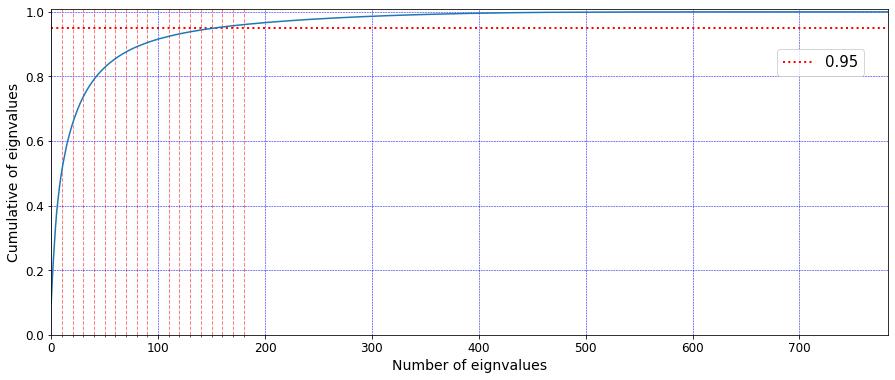

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plot_coverage(
    (eigenvalues / eigenvalues.sum()).cumsum(), 
    "Number of eignvalues", 
    "Cumulative of eignvalues"
)

The COVERAGE rate (e.g 0.95 = 95%) of the information in the data is represented with 154 PCs out of 784.

In [43]:
del eigenvalues

<hr/>

# PCA

Demonstrate the Scikit Learn PCA which identifies the top <b>k</b> principal components and ignore the rest of the components, by which the dimentionality can be reduced from n to k.

<img align="left" src="./images/pca/pca.idea.png" width="400">
<br/>

## Choosing k

Find <b>k</b> which covers 99% (or 95%) of the variance of the data. <br/>. The coverage is specified in the COVERGE variable.

<cite><b> Andrew Ng</b></cite>
<pre>
<img align="left" src="./images/pca/andrew_ng_choosing_k.png" width="750">
</pre>

In [44]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## Identify k for the coverage

Idenify the number of component (k+1) that cover the COVERAGE % of the information that the data has. Scikit Learn PCA.explained_variance_ratio_ tells the ratio of information each PC contributes to the data.

k-th principal compoent for 0.95 coverage is 153
Contributions of the top 5 principal components : [0.09705 0.07096 0.06169 0.05389 0.04869]
Cumulation of the top 5 principal components: [0.09705 0.16801 0.2297  0.28359 0.33228]


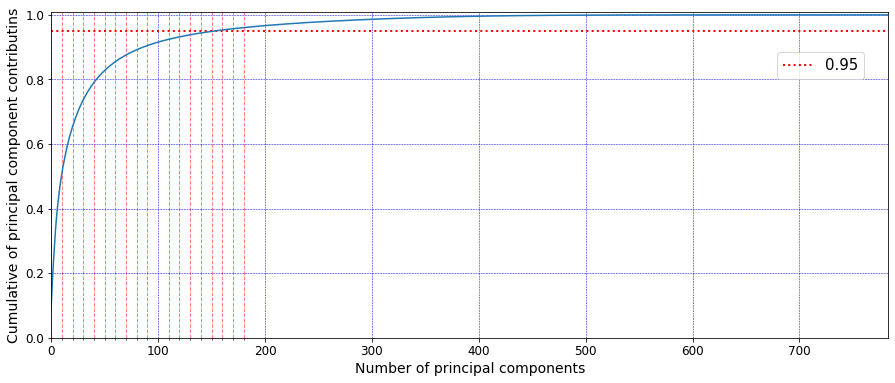

In [45]:
contribution_cumulatives = pca.explained_variance_ratio_.cumsum()

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plot_coverage(
    pca.explained_variance_ratio_.cumsum(), 
    "Number of principal components", 
    "Cumulative of principal component contributins"
)

print("Contributions of the top 5 principal components : {}".
      format(np.round(pca.explained_variance_ratio_[:5], decimals=5))
)
print("Cumulation of the top 5 principal components: {}".
      format(np.round(contribution_cumulatives[:5], decimals=5))
)

## Effect of the dimensionality reduction

Compare the original image and the one restored from the dimension reduced data.

In [46]:
pca = PCA(
    n_components=np.argmax(pca.explained_variance_ratio_.cumsum() >= COVERAGE) #, 
#    svd_solver="randomized", 
#    random_state=4
)
X_train_reduced = pca.fit_transform(X_train)
X_train_recovered = pca.inverse_transform(X_train_reduced)

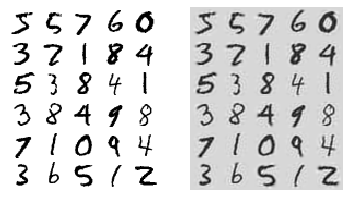

In [47]:
plt.subplot(121)
plot_digits(X_train[::2000])

plt.subplot(122)
plot_digits(X_train_recovered[::2000])
#plt.tight_layout()

In [48]:
#del X_train_reduced, X_train_recovered
#del pca, _pca

In [49]:
%%html
<style>
row {float:left}
</style>

## Visualize how two principal components can classify digits

For instance, digit 7 is represented by the Orange color. In the PC2 / PC4 space, '7' has a clear cluster.

| PC | PC | Description         
| :- | :- | :-
|PC1 | PC1 |Classifies digit 0  
|PC1 | PC2 |Classifies digit 1, 2, 7  
|PC2 | PC3 |Classifies digit 3
|PC2 | PC4 |Classifies digit 2, 7
|PC4 | PC4 |Classifies digit 6


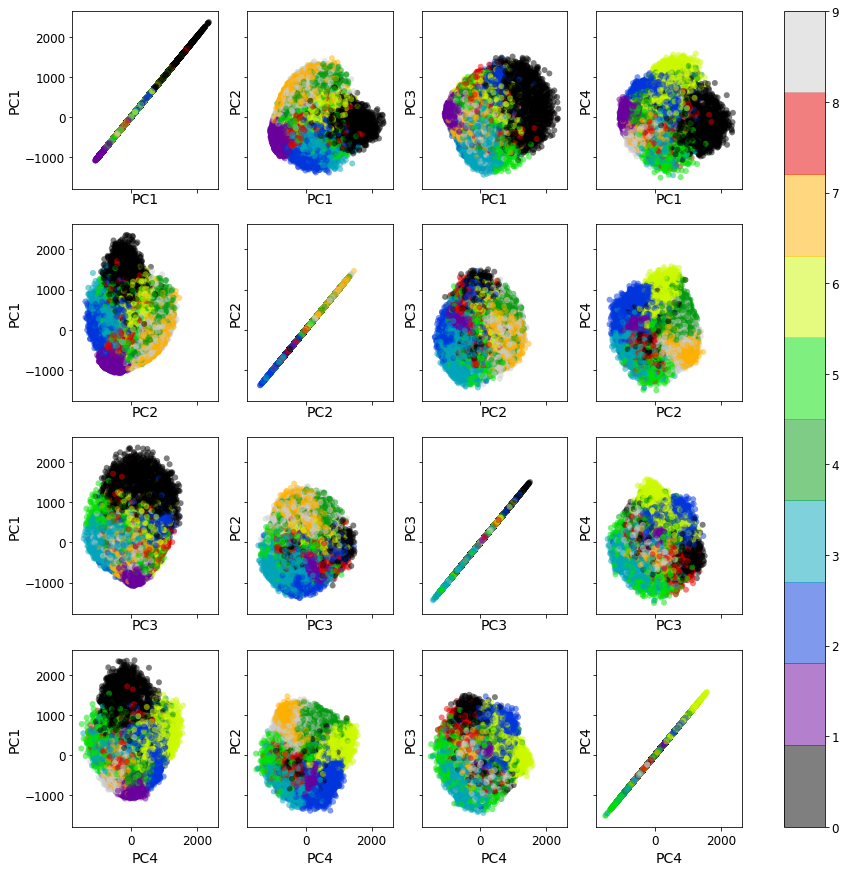

In [61]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(15, 15))

def plot_grid(projected, axes, x, y):
    path = axes[x, y].scatter(
        projected[:, x],
        projected[:, y], 
        c=y_train, 
        edgecolor='none', 
        alpha=0.5,
        cmap=plt.cm.get_cmap('nipy_spectral', 10)
    )
    axes[x, y].set_xlabel('PC{}'.format(x+1))
    axes[x, y].set_ylabel('PC{}'.format(y+1))
    return path

for i in range(0, nrows * ncols):
    path = plot_grid(X_train_reduced, axes, i % ncols, i // nrows)

cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat], orientation="vertical")
plt.colorbar(path, cax=cax, **kw)
   
#plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


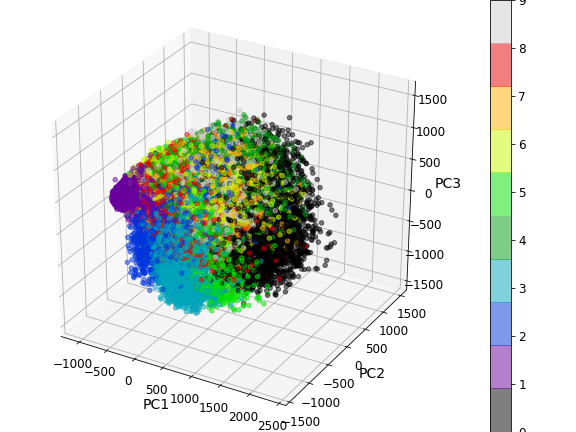

In [62]:
from mpl_toolkits.mplot3d import Axes3D

# --------------------------------------------------------------------------------
# To switch matplotlib backend
# https://stackoverflow.com/questions/43545050
# --------------------------------------------------------------------------------
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_grid_3D(projected, fig):
    ax = Axes3D(fig)
    path = ax.scatter(
        projected[:, 0], 
        projected[:, 1],
        projected[:, 2],
        c=y_train, 
        alpha=0.5,
        cmap=plt.cm.get_cmap('nipy_spectral', 10)
    )
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

    fig.colorbar(path)
    
fig = plt.figure(figsize=(8, 6))
plot_grid_3D(X_train_reduced, fig)
plt.show()

## KNN on dimension reduced data

Demonstrate the KNN (K Nearest Neighbour) to predict the hand written digits on the dimension reduced data. 
The time take on a Ubuntu 18.04 LTS PC with Intel Core i7 4th Gen 4770 with 8G memory:
<pre>
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  5.5min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.8min finished
</pre>

For comparision, the time taken for not dimension reduced data using AWS ml.c4.4xlarge instance on AWS:
 
<pre>
Using backend LokyBackend with 16 concurrent workers.
Done   3 out of  10 | elapsed: 62.4min remaining: 145.6min
Done   7 out of  10 | elapsed: 64.3min remaining: 27.6min
Done  10 out of  10 | elapsed: 64.4min finished
</pre>

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors=NUM_CLASSES, 
    weights='uniform',
    n_jobs=-1           # Use all processors
)

params_knn = knn.get_params()
print("KNN parameters = {}".format(params_knn))

KNN parameters = {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'weights': ["uniform", "distance"], 
        'n_neighbors': [NUM_CLASSES]
    }
]
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train_reduced, y_train)
knn = grid_search.best_estimator_

print("GridSearchCV best parameters for KNN is {}".format(grid_search.best_params_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  5.8min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.2min finished


GridSearchCV best parameters for KNN is {'n_neighbors': 10, 'weights': 'distance'}


### Confusion matrix
Confusion matrix of the KNN model result on the dimension reduced data.

In [24]:
from sklearn.metrics import confusion_matrix
X_test_reduced = pca.transform(X_test)
y_test_pred_knn = knn.predict(X_test_reduced)
confusion_matrix(y_test, y_test_pred_knn)

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1130,    2,    0,    0,    0,    2,    0,    0,    1],
       [  11,    3,  992,    2,    1,    0,    2,   15,    6,    0],
       [   0,    3,    1,  976,    1,   12,    0,    7,    6,    4],
       [   2,    8,    0,    0,  943,    0,    5,    2,    1,   21],
       [   3,    0,    0,    6,    2,  868,    7,    1,    1,    4],
       [   5,    3,    0,    0,    3,    1,  946,    0,    0,    0],
       [   0,   23,    4,    0,    1,    0,    0,  989,    0,   11],
       [   6,    2,    3,   12,    7,    6,    3,    6,  924,    5],
       [   4,    7,    2,    7,    7,    4,    1,    7,    2,  968]])

### Comparing with the KNN  on non reduced data result

Comparing with the prediction result confusion matrix on non-reduced data, the reduced data traning gives similar result. First rows is how number zero (0) is identified. Correctly identified 972 out of 980 (recall = 0.991836735). First column is how each number is identified as zero, e.g. total 1007 instances are predicted as zero (0) but 35 are false-positive (13 instances of two (2) are predicted as zero incorrectly).

<pre>
array([[ 972,    1,    1,    0,    0,    2,    3,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [  13,   10,  983,    2,    1,    0,    2,   17,    4,    0],
       [   0,    3,    1,  975,    1,   12,    1,    7,    5,    5],
       [   1,   11,    0,    0,  940,    0,    4,    1,    1,   24],
       [   4,    0,    0,    4,    2,  868,    6,    1,    1,    6],
       [   6,    4,    0,    0,    3,    2,  943,    0,    0,    0],
       [   0,   25,    3,    0,    1,    0,    0,  987,    0,   12],
       [   6,    4,    4,   10,    6,    8,    3,    6,  919,    8],
       [   5,    6,    3,    5,    8,    4,    1,   10,    2,  965]])
</pre>

### Performance of KNN on dimension reduced data 

In [25]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_knn, recall_knn, fscore_knn, support_knn = score(y_test, y_test_pred_knn)

import pandas as pd
data_knn = [
#    np.append(["Accracy"], accuracy_knn),
    np.append(["Precision"], precision_knn),
    np.append(["Recall"], recall_knn),
    np.append(["F1"], fscore_knn),
    np.append(["Support"], support_knn)
]
df_knn = pd.DataFrame(data_knn)
df_knn.columns = [
    "Metric",
    "0", "1", "2", "3", "4", "5", "6", "7", "8", "9"
]
df_knn

,Metric,0,1,2,3,4,5,6,7,8,9
0,Precision,0.9691235059760956,0.9576271186440678,0.9870646766169154,0.9730807577268196,0.9772020725388602,0.9730941704035875,0.9762641898864809,0.9620622568093385,0.9829787234042553,0.9546351084812623
1,Recall,0.9928571428571429,0.9955947136563876,0.9612403100775194,0.9663366336633663,0.960285132382892,0.9730941704035875,0.9874739039665971,0.9620622568093385,0.9486652977412731,0.9593657086223984
2,F1,0.9808467741935484,0.9762419006479482,0.9739813451153658,0.9696969696969697,0.9686697483307652,0.9730941704035875,0.9818370524130774,0.9620622568093385,0.9655172413793103,0.9569945625308947
3,Support,980,1135,1032,1010,982,892,958,1028,974,1009


In [26]:
del pca, X_train_reduced, X_test_reduced, y_test_pred_knn

# SVD

Demonstrate the SVD mechanism and usage in reducing dimeisions, which is actually used in Scikit Learn PCA.

[We Recommend a Singular Value Decomposition](http://www.ams.org/publicoutreach/feature-column/fcarc-svd)<br>

<img align="left" src="./images/pca/onthgonal_to_onthogonal.png" width="800">
<img align="left" src="./images/pca/SVDInduction.png" width="800">

With those (u, v), any matrix M, including a Covariance Matrix, can be decomposed as below.
<br/>
<img align="left" src="./images/pca/SVD.png" width="1000">

## Relation between SVD and PCA

The eignvectors <b>E</b> of PCA is the same with the singular vector <b>V</b> of SVD. <br/>
<img align="left" src="./images/pca/PCA_SVD_Relation.png" width="500">
<img align="left" src="./images/pca/SVD2PCA.png" width="1000">
<img align="left" src="./images/pca/SVD_PCA.png" width="1000">

### Plot eigenvalue cumulative obtained via singular values

Visualize how much percentage of the total information in the data can be represented with how many principal components.

In [27]:
X_centered = X_train - X_train.mean(axis=0)
# --------------------------------------------------------------------------------
# Use scipy to avoid numpy MemoryError: Unable to allocate array with shape
# https://stackoverflow.com/questions/19743525/
# https://github.com/numpy/numpy/issues/4268
# http://fa.bianp.net/blog/2012/singular-value-decomposition-in-scipy/
#
# Use full_matrices=False
# --------------------------------------------------------------------------------
#U, s, Vt = np.linalg.svd(X_mm - X_mm.mean(axis=0))
# --------------------------------------------------------------------------------
U, s, Vt= sp.linalg.svd(X_centered, full_matrices=False)
# --------------------------------------------------------------------------------

In [28]:
n_samples, n_features = X_centered.shape

sigma_cumulatives = ((s ** 2) / (n_samples - 1)).cumsum()
sigma_cumulatives = sigma_cumulatives / sigma_cumulatives[-1]

k-th principal compoent for 0.95 coverage is 153


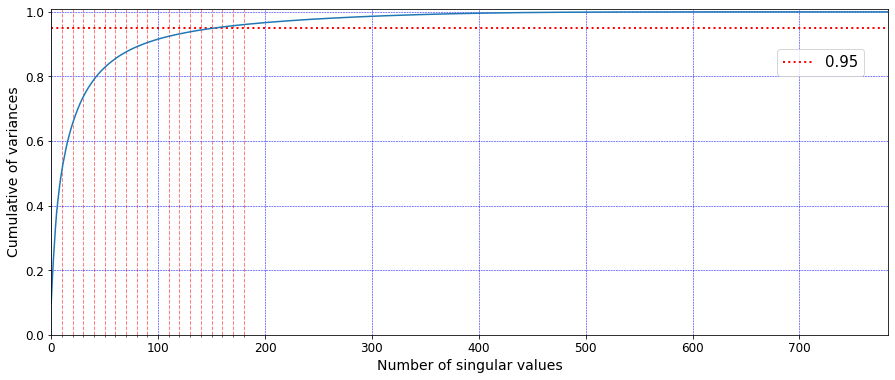

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plot_coverage(
    sigma_cumulatives, 
    "Number of singular values",
    "Cumulative of variances"
)

# Handling large data

Ways to run PCA on a huge data set which may not fit into the memory.


## Incremental PCA
A large data can be split into mini-batches and Scikit learn IncrementalPCA can take one mini-batch at a time.

In [30]:
_X_train = np.copy(X_train)

In [31]:
from sklearn.decomposition import IncrementalPCA

m, n = _X_train.shape
n_batches = 100

ipca = IncrementalPCA(batch_size=(m // n_batches))
ipca.fit(_X_train)
"""
ipca = IncrementalPCA()
for X_batch in np.array_split(X_train, n_batches):
    ipca.partial_fit(X_batch)
"""

/home/masa/anaconda3/envs/Jupyter-Notebook/lib/python3.7/site-packages/sklearn/decomposition/incremental_pca.py:294: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/home/masa/anaconda3/envs/Jupyter-Notebook/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


'\nipca = IncrementalPCA()\nfor X_batch in np.array_split(X_train, n_batches):\n    ipca.partial_fit(X_batch)\n'

k-th principal compoent for 0.95 coverage is 153


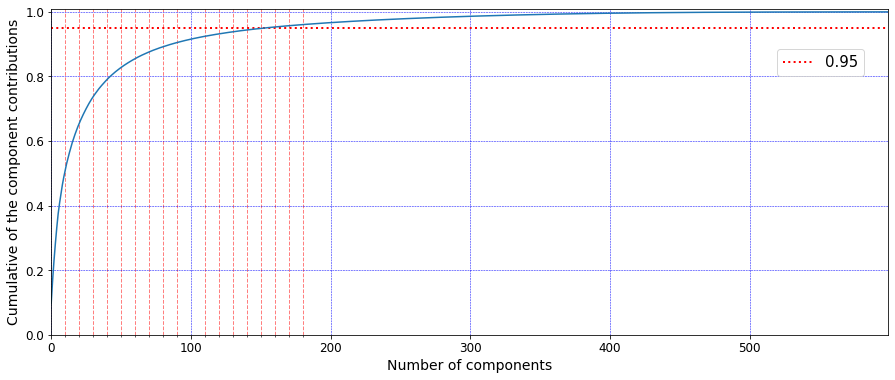

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plot_coverage(
    ipca.explained_variance_ratio_.cumsum(), 
    "Number of components", 
    "Cumulative of the component contributions"
)

In [33]:
m, n = _X_train.shape
n_batches = 100
n_components=np.argmax(ipca.explained_variance_ratio_.cumsum() >= COVERAGE)
_ipca = IncrementalPCA(
    copy=False,
    n_components=n_components,
    batch_size=(m // n_batches)
)
X_train_recuced_ipca = _ipca.fit_transform(_X_train)
X_train_recovered_ipca = _ipca.inverse_transform(X_train_recuced_ipca)

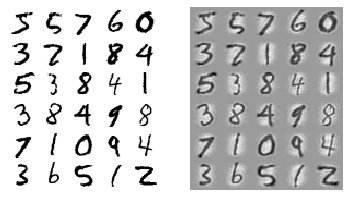

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.subplot(121)
plot_digits(X_train[::2000])

plt.subplot(122)
plot_digits(X_train_recovered_ipca[::2000])

In [35]:
del X_train_recuced_ipca, X_train_recovered_ipca
del ipca, _ipca

## Numpy memmap
NumPy’s memmap treat a large array stored in a file on disk as if it were entirely in memory. It loads only the data it needs in memory, when it needs it. Since the IncrementalPCA class uses only a small part of the array at any given time, the memory usage remains under control.

In [36]:
np.save("X_train.npy", X_train)
X_mm = np.load('X_train.npy', mmap_mode='r')
X_mm[9179][599]

200.0

In [37]:
from sklearn.decomposition import PCA

m, n = X_train.shape
n_batches = 100

#ipca_mm = IncrementalPCA(batch_size=(m // n_batches))
#ipca_mm.fit(X_mm)
#X_train_recuced_ipca_mm = ipca_mm.fit_transform(X_mm) 

pca_mm = PCA(
    n_components=154,
)
X_train_recuced_pca_mm = pca_mm.fit_transform(X_mm)
X_train_recovered_pca_mm = pca_mm.inverse_transform(X_train_recuced_pca_mm)

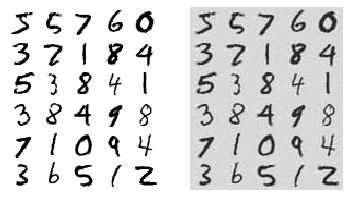

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.subplot(121)
plot_digits(X_train[::2000])

plt.subplot(122)
plot_digits(X_train_recovered_pca_mm[::2000])

In [39]:
del X_mm, X_train_recovered_pca_mm
del pca_mm